In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

seed=2024
np.random.seed(seed)

In [234]:
#config
num_classes = 7
prefix = '7C'

df_full = pd.read_csv("../../data/dataframes/all_patchs_dataframe_augmented.csv")

# select the rows where the patch name are are valid 
regex = r'_row_\d+_col_\d+'
regex_general = r'row_.*_col_.*'

list_classes = df_full['classe'].unique()
list_labels = [0, 1, 2, 3, 4, 5]
list_classes, list_labels

(array(['Acinaire', 'Fibrose', 'Foetal', 'Glandulaire complexe',
        'Hémorragique', 'Lépidique', 'Micropapillaire', 'Mucineux',
        'Normal', 'Nécrose', 'Papillaire', 'Réactionnel', 'Solide',
        'Tissu lymphoïde'], dtype=object),
 [0, 1, 2, 3, 4, 5])

In [235]:
if prefix == "6C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'T', 'Acinaire':'T','Foetal':'T','Lépidique':'T','Mucineux':'T', 'Papillaire':'T',
                'Solide':'T', 'Glandulaire complexe':'T','Micropapillaire':'T'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'T':5}
elif prefix=="7C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'TuGr12', 'Acinaire':'TuGr12','Foetal':'TuGr12','Lépidique':'TuGr12','Mucineux':'TuGr12', 'Papillaire':'TuGr12',
                'Solide':'TuGr3', 'Glandulaire complexe':'TuGr3','Micropapillaire':'TuGr3'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'TuGr12':5, "TuGr3":6}
    
label_to_idx = {v:k for k,v in idx_to_label.items()}

label_to_idx

{0: 'P', 1: 'H', 2: 'Né', 3: 'TL', 4: 'Fi', 5: 'TuGr12', 6: 'TuGr3'}

In [236]:
df_full['tetraClass'] = df_full['classe'].apply(lambda x : all_classes[x]) 
df_full['label'] = df_full['tetraClass'].apply(lambda x: idx_to_label[x])
df_full = df_full.sort_values(by='label')
df_full

,Patient,lame,patch,classe,tetraClass,label
41686,9,No,No_9_S (56)_HF.jpg,Normal,P,0
59546,7,R,R_7_A (1089)_VF.jpg,Réactionnel,P,0
59547,398,R,R_398_A (23)_HF.jpg,Réactionnel,P,0
59548,7,R,R_7_A (23)_VF.jpg,Réactionnel,P,0
59549,398,R,R_398_A (578)_HF.jpg,Réactionnel,P,0
...,...,...,...,...,...,...
75645,231,S,S_231_A (1456)_HF.jpg,Solide,TuGr3,6
75646,231,S,S_231_A (113)_VF.jpg,Solide,TuGr3,6
75647,231,S,S_231_A (1467)_HF.jpg,Solide,TuGr3,6
75649,231,S,S_231_A (1568).jpg,Solide,TuGr3,6


In [237]:
df_full_valid = df_full[df_full['patch'].str.contains(regex_general)]
df_full_not_valid = df_full[~df_full['patch'].str.contains(regex_general)]
df_full_valid

,Patient,lame,patch,classe,tetraClass,label
40628,2,B,2_B_row_28_col_36_VF.jpg,Normal,P,0
40624,44,A,44_A_row_23_col_118_VF.jpg,Normal,P,0
40639,40,A,40_A_row_217_col_94_HF.jpg,Normal,P,0
40660,2,B,2_B_row_85_col_33_HF.jpg,Normal,P,0
40656,44,A,44_A_row_43_col_109_HF.jpg,Normal,P,0
...,...,...,...,...,...,...
21321,7,A,7_A_row_134_col_40_HF.jpg,Glandulaire complexe,TuGr3,6
21323,7,A,7_A_row_122_col_20.jpg,Glandulaire complexe,TuGr3,6
21291,7,A,7_A_row_134_col_39_VF.jpg,Glandulaire complexe,TuGr3,6
21288,2,B,2_B_row_18_col_58.jpg,Glandulaire complexe,TuGr3,6


In [238]:
# print the valid patients
all_patients = sorted(df_full['Patient'].unique())
valid_patients = sorted(df_full_valid['Patient'].unique())
non_valid_patients = sorted(df_full_not_valid['Patient'].unique())
mixed_patients = list(set(valid_patients) & set(non_valid_patients))
print('all patients:', all_patients)
print('patients with valid data:', valid_patients)
print('patients with non valid data:', non_valid_patients)
print('patients with mixed data:', mixed_patients)

valid_patients = [patient for patient in valid_patients if patient not in mixed_patients]
print('patients with valid data:', valid_patients)

valid_patients.remove(58)
valid_patients.remove(226)
valid_patients.remove(133)
non_valid_patients.append(58)
non_valid_patients.append(226)
non_valid_patients.append(133)
print('patients test:', valid_patients)
print('patients train:', non_valid_patients)


all patients: [2, 3, 4, 5, 6, 7, 9, 13, 14, 16, 17, 22, 23, 32, 40, 44, 58, 72, 114, 133, 169, 192, 226, 230, 231, 247, 398]
patients with valid data: [2, 7, 13, 17, 32, 40, 44, 58, 133, 192, 226]
patients with non valid data: [3, 4, 5, 6, 7, 9, 14, 16, 22, 23, 72, 114, 169, 230, 231, 247, 398]
patients with mixed data: [7]
patients with valid data: [2, 13, 17, 32, 40, 44, 58, 133, 192, 226]
patients test: [2, 13, 17, 32, 40, 44, 192]
patients train: [3, 4, 5, 6, 7, 9, 14, 16, 22, 23, 72, 114, 169, 230, 231, 247, 398, 58, 226, 133]


In [239]:
patients_test={patient : 'test' for patient in valid_patients}
patients_train={patient : 'train' for patient in all_patients if patient not in valid_patients}

patients_to_dataset = {**patients_train, **patients_test}

print('Total n patients:', len(patients_to_dataset), '      n train patients:', len(patients_train), '     n test patients', len(patients_test))
df_full['dataset']=df_full['Patient'].apply(lambda x : patients_to_dataset[int(x)])
df_full

Total n patients: 27       n train patients: 20      n test patients 7


,Patient,lame,patch,classe,tetraClass,label,dataset
41686,9,No,No_9_S (56)_HF.jpg,Normal,P,0,train
59546,7,R,R_7_A (1089)_VF.jpg,Réactionnel,P,0,train
59547,398,R,R_398_A (23)_HF.jpg,Réactionnel,P,0,train
59548,7,R,R_7_A (23)_VF.jpg,Réactionnel,P,0,train
59549,398,R,R_398_A (578)_HF.jpg,Réactionnel,P,0,train
...,...,...,...,...,...,...,...
75645,231,S,S_231_A (1456)_HF.jpg,Solide,TuGr3,6,train
75646,231,S,S_231_A (113)_VF.jpg,Solide,TuGr3,6,train
75647,231,S,S_231_A (1467)_HF.jpg,Solide,TuGr3,6,train
75649,231,S,S_231_A (1568).jpg,Solide,TuGr3,6,train


In [225]:
patients_test, patients_train, patients_to_dataset

({2: 'test',
  13: 'test',
  17: 'test',
  32: 'test',
  40: 'test',
  44: 'test',
  192: 'test'},
 {3: 'train',
  4: 'train',
  5: 'train',
  6: 'train',
  7: 'train',
  9: 'train',
  14: 'train',
  16: 'train',
  22: 'train',
  23: 'train',
  58: 'train',
  72: 'train',
  114: 'train',
  133: 'train',
  169: 'train',
  226: 'train',
  230: 'train',
  231: 'train',
  247: 'train',
  398: 'train'},
 {3: 'train',
  4: 'train',
  5: 'train',
  6: 'train',
  7: 'train',
  9: 'train',
  14: 'train',
  16: 'train',
  22: 'train',
  23: 'train',
  58: 'train',
  72: 'train',
  114: 'train',
  133: 'train',
  169: 'train',
  226: 'train',
  230: 'train',
  231: 'train',
  247: 'train',
  398: 'train',
  2: 'test',
  13: 'test',
  17: 'test',
  32: 'test',
  40: 'test',
  44: 'test',
  192: 'test'})

In [240]:
dtrain= df_full.loc[df_full['dataset']=='train']
dtest = df_full.loc[df_full['dataset']=='test']

print('n train:', len(dtrain), '     n test:', len(dtest))

n train: 71601      n test: 11773


In [241]:
# save the splits
support_split_path = "../../data/splits/"+prefix+"_support_augmented.csv"
query_split_path = "../../data/splits/"+prefix+"_query_augmented.csv"
dtrain.to_csv(support_split_path, index=False)
dtest.to_csv(query_split_path, index=False)

In [242]:
if prefix=="7C": 
    colors=['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'gold', 'crimson']
elif prefix=="6C": 
    colors=['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'crimson']
explode=tuple([0.05]*len(colors))

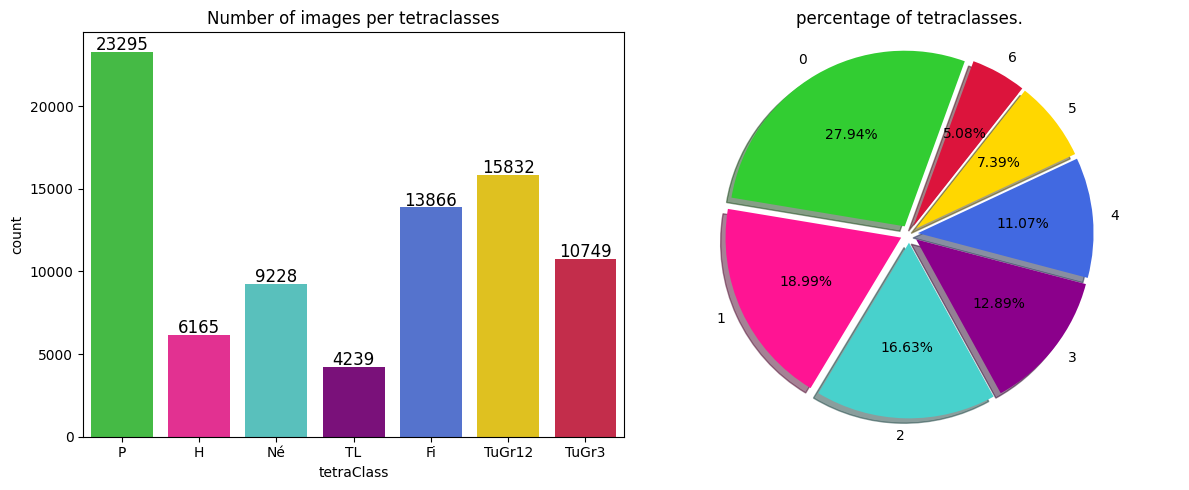

In [243]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df_full, x='tetraClass', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of images per tetraclasses")
plt.subplot(122)
sizes = [df_full["tetraClass"].value_counts()[val] for val in idx_to_label.values()]
plt.pie(sizes, explode=explode, colors=colors, labels=list(idx_to_label.values()),  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('percentage of tetraclasses.')
plt.tight_layout()
plt.savefig(f'Statictics of tetraclass splits_{prefix}.jpeg')
plt.show()

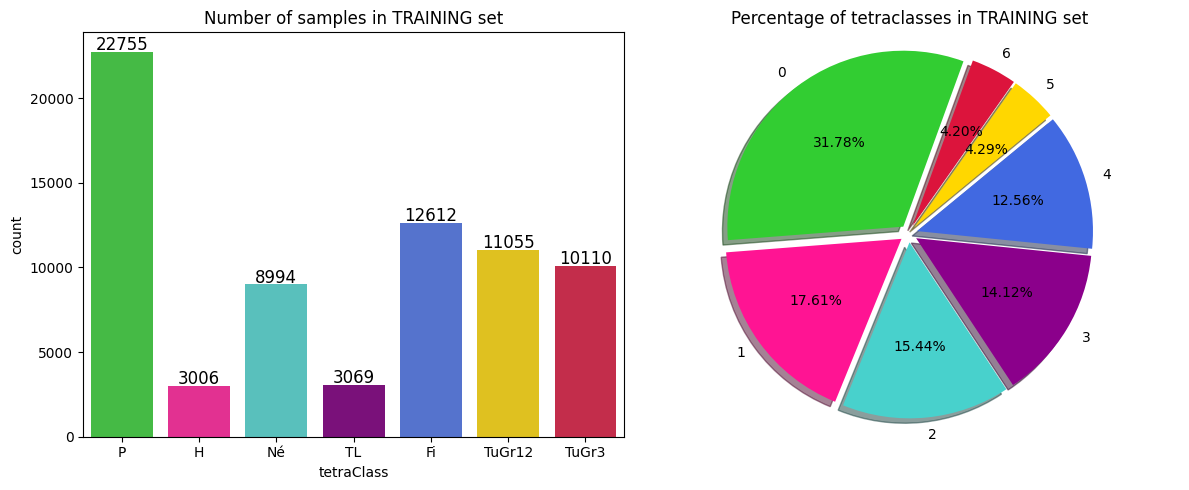

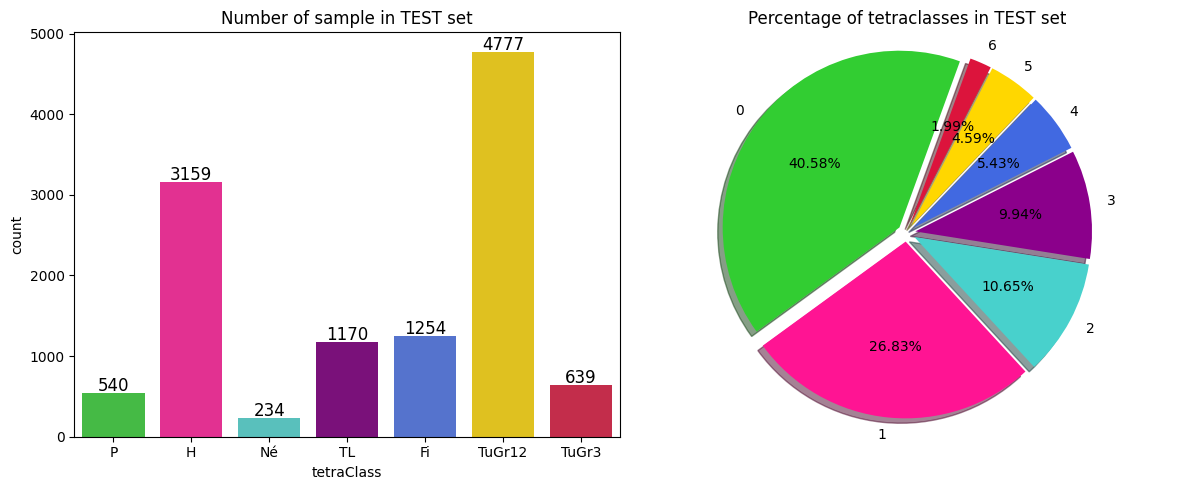

In [244]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df_full.loc[df_full['dataset']=='train'], x='tetraClass', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of samples in TRAINING set")

plt.subplot(122)
sizes = [df_full.loc[df_full['dataset']=='train']["tetraClass"].value_counts()[val] for val in idx_to_label.values()]
plt.pie(sizes, explode=explode, labels=list(idx_to_label.values()), colors=colors,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of tetraclasses in TRAINING set')
plt.tight_layout()
plt.savefig(f'Statictics of training tetraclass splits_{prefix}.jpeg')
plt.show()

plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df_full.loc[df_full['dataset']=='test'], x='tetraClass', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of sample in TEST set")

plt.subplot(122)
sizes = [df_full.loc[df_full['dataset']=='test']["tetraClass"].value_counts()[val] for val in idx_to_label.values()]
plt.pie(sizes, explode=explode, labels=list(idx_to_label.values()), colors=colors,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of tetraclasses in TEST set')
plt.tight_layout()
plt.savefig(f'Statictics of testing tetraclass splits_{prefix}.jpeg')
plt.show()

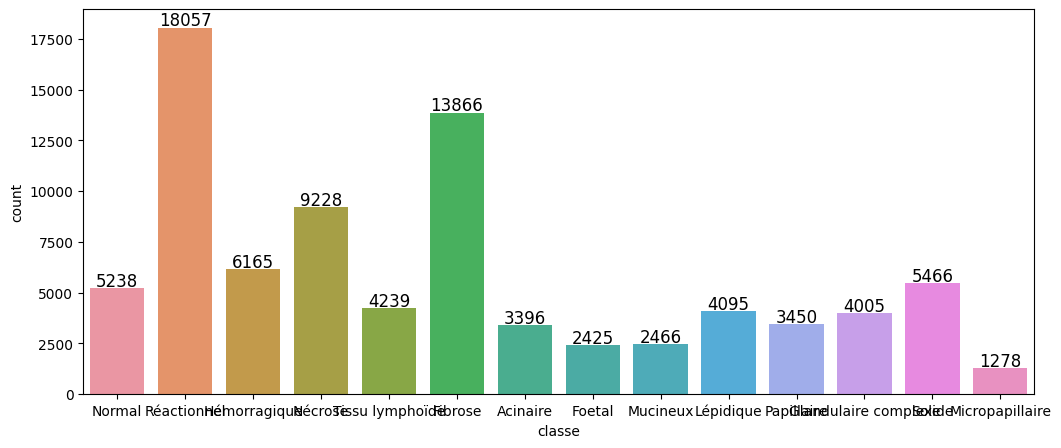

In [245]:
plt.figure(figsize = (27,5))
plt.subplot(121)
sns.countplot(df_full, x='classe')
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.savefig(f'Statictics of class splits_{prefix}.jpeg')
plt.show()

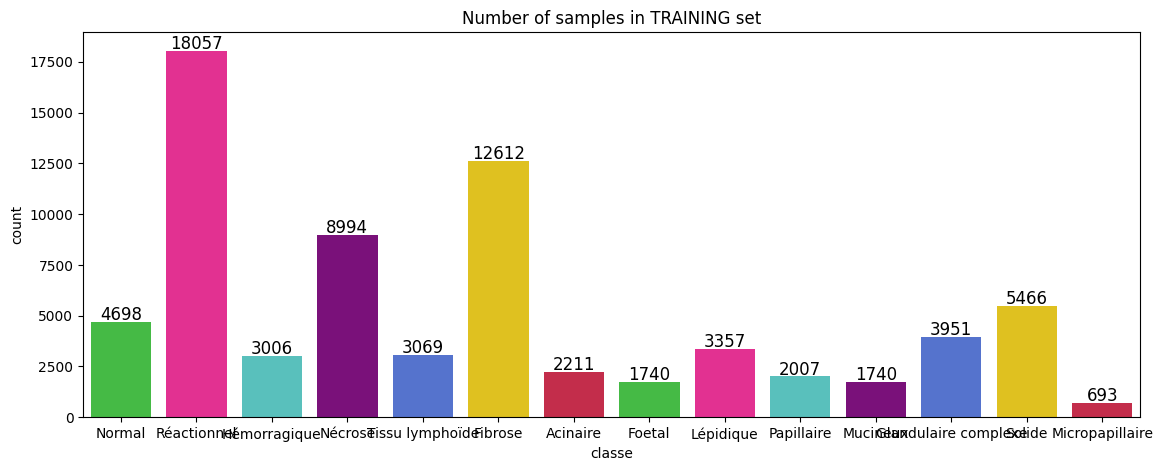

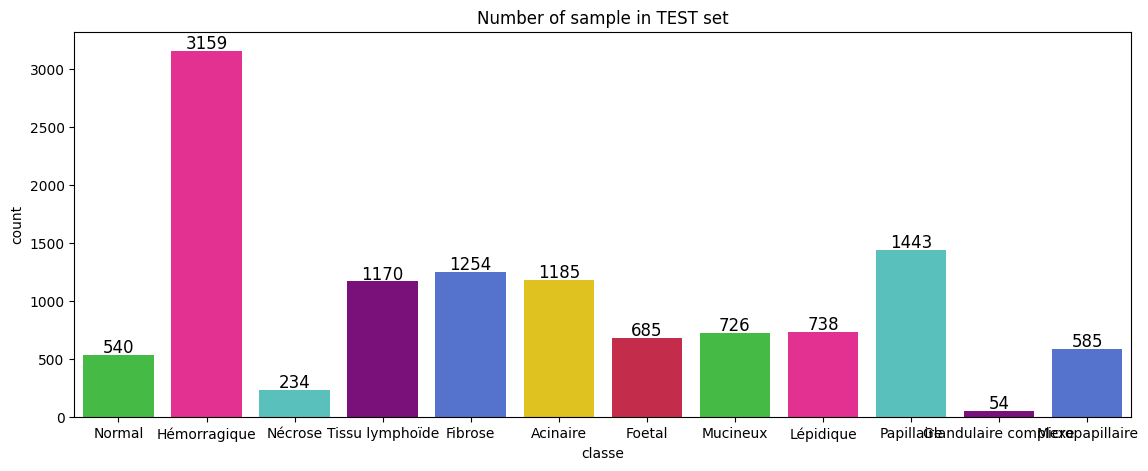

In [246]:
plt.figure(figsize = (30,5))
plt.subplot(121)
sns.countplot(df_full.loc[df_full['dataset']=='train'], x='classe', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of samples in TRAINING set")
plt.savefig(f'Statictics of training class splits_{prefix}.jpeg')
plt.show()

plt.figure(figsize = (30,5))
plt.subplot(121)
sns.countplot(df_full.loc[df_full['dataset']=='test'], x='classe', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of sample in TEST set")
plt.savefig(f'Statictics of testing class splits_{prefix}.jpeg')
plt.show()

In [216]:
for p in dtest['Patient'].unique():
    print(p,'\n',dict(df_full_valid.loc[df_full_valid['Patient']==p]['classe'].value_counts()))

40 
 {'Micropapillaire': 189, 'Hémorragique': 14, 'Normal': 5, 'Papillaire': 3, 'Tissu lymphoïde': 2}
2 
 {'Papillaire': 466, 'Fibrose': 208, 'Acinaire': 116, 'Hémorragique': 90, 'Normal': 53, 'Tissu lymphoïde': 20, 'Glandulaire complexe': 18, 'Lépidique': 11, 'Micropapillaire': 4}
44 
 {'Mucineux': 242, 'Hémorragique': 136, 'Normal': 103}
192 
 {'Foetal': 137, 'Hémorragique': 47, 'Tissu lymphoïde': 13, 'Normal': 6}
13 
 {'Acinaire': 276, 'Lépidique': 180, 'Normal': 12, 'Papillaire': 7, 'Tissu lymphoïde': 3, 'Micropapillaire': 2, 'Fibrose': 1}
17 
 {'Nécrose': 39, 'Hémorragique': 10, 'Papillaire': 5, 'Lépidique': 4, 'Tissu lymphoïde': 3, 'Acinaire': 3, 'Normal': 1}
32 
 {'Tissu lymphoïde': 89, 'Hémorragique': 54, 'Lépidique': 51}


In [91]:
# Assuming df1 and df2 are your dataframes
df1 = df_full[df_full['patch'].str.contains(regex_general)]
df2 = df_full[df_full['patch'].str.contains(regex)]
sub = df1.merge(df2, how='outer', indicator=True)
sub = sub[sub['_merge'] == 'left_only']
sub

,Patient,lame,patch,classe,_merge
13389,2,B,2_B_row_P_23_col_47_VF.jpg,Papillaire,left_only
13804,2,B,2_B_row_P_23_col_49.jpg,Papillaire,left_only
13822,2,B,2_B_row_P_23_col_49_HF.jpg,Papillaire,left_only
13928,2,B,2_B_row_P_23_col_50.jpg,Papillaire,left_only
13930,7,A,7_A_row_1P_23_col_15.jpg,Papillaire,left_only
13955,2,B,2_B_row_P_23_col_47_HF.jpg,Papillaire,left_only
13969,7,A,7_A_row_1P_23_col_15_VF.jpg,Papillaire,left_only
14001,2,B,2_B_row_P_23_col_48_VF.jpg,Papillaire,left_only
14040,2,B,2_B_row_P_23_col_51_HF.jpg,Papillaire,left_only
14184,2,B,2_B_row_P_23_col_52_HF.jpg,Papillaire,left_only


In [92]:
df7 = df_full[df_full['Patient'] == 7]
df7

,Patient,lame,patch,classe
4,7,A,A_7_A (237)_HF.jpg,Acinaire
5,7,A,A_7_A (86)_VF.jpg,Acinaire
10,7,A,A_7_A (15)_VF.jpg,Acinaire
15,7,A,A_7_A (77)_VF.jpg,Acinaire
23,7,A,A_7_A (12).jpg,Acinaire
...,...,...,...,...
83351,7,A,7_A_row_132_col_50_VF.jpg,Tissu lymphoïde
83355,7,A,7_A_row_130_col_50_rot90.jpg,Tissu lymphoïde
83360,7,A,7_A_row_131_col_67_rot45.jpg,Tissu lymphoïde
83368,7,TL,TL_7_A (43)_rot135.jpg,Tissu lymphoïde
